In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"C:\Users\Parke\Documents\GitHub\playground\data\ex2data1.txt", header=None)

In [2]:
data = pd.read_csv(r"C:\Users\Parke\Documents\GitHub\playground\data\ex2data1.txt", header=None)

X = np.array(df[[0, 1]])
y = df[2]
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


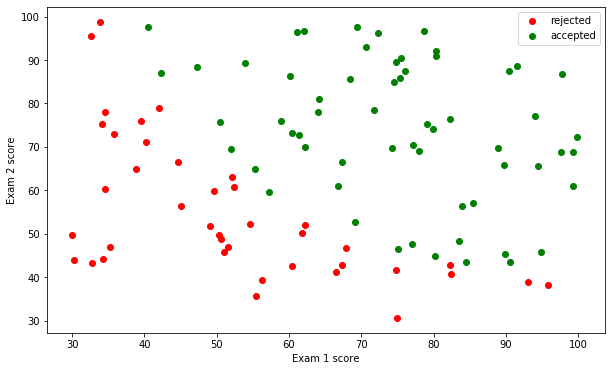

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='rejected')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='g', label='accepted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [4]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def cost(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [5]:
(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y[:, np.newaxis]
theta = np.zeros((n+1,1)) # intializing theta with all zeros
J = cost(theta, X, y)
print(J)

0.6931471805599453


In [6]:
from scipy import optimize
temp = optimize.fmin_tnc(func = cost, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X, y.flatten()))
#the output of above function is a tuple whose first element #contains the optimized values of theta
theta_optimized = temp[0]
print(theta_optimized)

[-25.16131862   0.20623159   0.20147149]


In [7]:
J = cost(theta_optimized[:,np.newaxis], X, y)
print(J)

0.20349770158947464


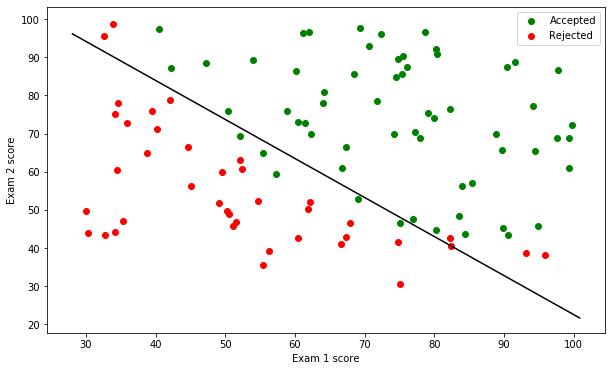

In [8]:
plt.figure(figsize=(10, 6))
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x))  
mask = y.flatten() == 1
accepted = plt.scatter(X[mask][:,1], X[mask][:,2], color='g')
rejected = plt.scatter(X[~mask][:,1], X[~mask][:,2], color='r')
decision_boundary = plt.plot(plot_x, plot_y, color='black')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((accepted, rejected), ('Accepted', 'Rejected'))
plt.show()

In [9]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)
accuracy(X, y.flatten(), theta_optimized, 0.5)

89.0
